In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale

def Sigmoid(z):
    return 1.0/(1+np.exp(-z))
def Predict(x,w):
    z = np.dot(x, w)
    return Sigmoid(z)
def cost_function(features, labels, weights):
    n = len(labels)
    predictions = Predict(features, weights)
    cost_class1 = -np.log(predictions)*labels
    cost_class2 = -np.log(1-predictions)*(1-labels)
    cost = cost_class1 + cost_class2
    return cost.sum()/n
def update_weight(features, labels, weights, learning_rate):
    n = len(labels)
    predictions = Predict(features, weights)
    gradient = np.dot(features.T, predictions-labels)
    gradient /= n
    gradient *= learning_rate
    weights = weights - gradient
    return weights
def train(features, labels, weights, learning_rate, iter):
    cost_history = []
    for i in range(iter):
        weights = update_weight(features, labels, weights, learning_rate)
        cost = cost_function(features, labels, weights)
        cost_history.append(cost)
    return weights, cost_history
def Scale_data(data):
    data.age=scale(data.age)
    data.trestbps=scale(data.trestbps)
    data.chol=scale(data.chol)
    data.thalach=scale(data.thalach)
    data.oldpeak=scale(data.oldpeak)
    return data
data = pd.read_csv('heart.csv')
labels = data[:718].target.to_numpy()

In [3]:
positive = data.loc[data.target==1]
positive

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
5,58,0,0,100,248,0,0,122,0,1.0,1,0,2,1
10,71,0,0,112,149,0,1,125,0,1.6,1,0,2,1
12,34,0,1,118,210,0,1,192,0,0.7,2,0,2,1
15,34,0,1,118,210,0,1,192,0,0.7,2,0,2,1
16,51,0,2,140,308,0,0,142,0,1.5,2,1,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1011,45,1,1,128,308,0,0,170,0,0.0,2,0,2,1
1014,44,0,2,108,141,0,1,175,0,0.6,1,0,2,1
1019,47,1,0,112,204,0,1,143,0,0.1,2,0,2,1
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1


In [4]:
negative = data.loc[data.target==0]
negative

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1017,53,1,0,123,282,0,1,95,1,2.0,1,2,3,0
1018,41,1,0,110,172,0,0,158,0,0.0,2,0,3,0
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0


In [15]:
cost_history = []
features = data.drop(['target'], axis=1)
features["bias"] = np.ones(1025)
features

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,bias
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,1.0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,1.0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,1.0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,1.0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1.0
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,1.0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,1.0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1.0


C:\Users\TechCare\AppData\Local\Temp\ipykernel_2232\3613183925.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.age=scale(data.age)
C:\Users\TechCare\AppData\Local\Temp\ipykernel_2232\3613183925.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.trestbps=scale(data.trestbps)
C:\Users\TechCare\AppData\Local\Temp\ipykernel_2232\3613183925.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

S

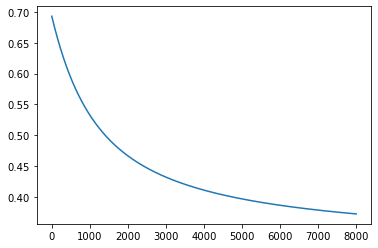

In [14]:
#data_train: 70%, data_test= 30%
weights = np.zeros([14], float)
weights, cost_history = train(Scale_data(features[:718]).to_numpy(), labels, weights, 0.001, 8000)
weights
plt.plot(cost_history)

In [8]:
predictions = Predict(Scale_data(features[:718]).to_numpy(), weights)
predictions

C:\Users\TechCare\AppData\Local\Temp\ipykernel_2232\3613183925.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.age=scale(data.age)
C:\Users\TechCare\AppData\Local\Temp\ipykernel_2232\3613183925.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.trestbps=scale(data.trestbps)
C:\Users\TechCare\AppData\Local\Temp\ipykernel_2232\3613183925.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

S

array([0.30883406, 0.0892432 , 0.0623235 , 0.44621426, 0.04459289,
       0.37647094, 0.02949413, 0.13363995, 0.44168524, 0.02911028,
       0.33522683, 0.12900279, 0.92471058, 0.00993795, 0.55260502,
       0.92471058, 0.65672789, 0.04944027, 0.8140259 , 0.87867582,
       0.51816324, 0.39283922, 0.20169257, 0.91883377, 0.93455913,
       0.26017893, 0.89968033, 0.55048992, 0.59031587, 0.09533649,
       0.21211683, 0.8140259 , 0.10392469, 0.11094805, 0.91196346,
       0.46914838, 0.64008729, 0.71298157, 0.10997522, 0.59581476,
       0.7920579 , 0.71790914, 0.7230443 , 0.44168524, 0.78278193,
       0.77570032, 0.73130773, 0.14125801, 0.72565131, 0.17407676,
       0.91401119, 0.30416583, 0.61733311, 0.21867272, 0.01501022,
       0.01501022, 0.78437801, 0.78918069, 0.61611801, 0.65561378,
       0.92357865, 0.72565131, 0.09198494, 0.76668695, 0.92357865,
       0.82195141, 0.64041815, 0.25013248, 0.95342611, 0.00614217,
       0.0418854 , 0.11883538, 0.17870801, 0.39784028, 0.21739

In [10]:
def Boundary(predictions):
    for i in range(len(predictions)):
        if predictions[i] >= 0.5:
            predictions[i] = 1
        else:
            predictions[i] = 0
    return predictions


In [11]:
predictions = Boundary(predictions)
predictions

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 1., 1.,
       0., 1., 1., 1., 0., 0., 1., 1., 0., 1., 1., 1., 0., 0., 1., 0., 0.,
       1., 0., 1., 1., 0., 1., 1., 1., 1., 0., 1., 1., 1., 0., 1., 0., 1.,
       0., 1., 0., 0., 0., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 0.,
       1., 0., 0., 0., 0., 0., 0., 1., 1., 0., 1., 1., 1., 0., 0., 1., 1.,
       1., 1., 0., 0., 0., 1., 1., 0., 0., 1., 1., 1., 0., 0., 1., 1., 1.,
       1., 1., 1., 0., 0., 0., 1., 0., 1., 0., 0., 0., 1., 0., 0., 0., 1.,
       1., 1., 0., 0., 1., 0., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 0.,
       1., 1., 1., 1., 0., 0., 0., 1., 1., 0., 1., 1., 1., 1., 0., 1., 0.,
       1., 0., 1., 1., 1., 1., 1., 0., 1., 0., 0., 0., 0., 0., 1., 1., 1.,
       1., 0., 1., 1., 0., 0., 0., 0., 1., 0., 0., 1., 0., 1., 1., 0., 0.,
       0., 0., 0., 1., 1., 1., 1., 0., 1., 0., 1., 1., 0., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 0., 1., 0., 0., 1., 1., 1., 0., 1., 0., 0., 1.,
       0., 1., 1., 1., 1.

In [12]:
def Evaluation(predictions, labels):
    TP = TN = FN = FP = 0
    for i in range(len(labels)):
        if predictions[i]==labels[i]==1:
            TP+=1
        elif predictions[i]==1 and labels[i]==0:
            FP+=1
        elif predictions[i]==0 and labels[i]==1:
            FN+=1
        elif predictions[i]==labels[i]==0:
            TN+=1
    return TP, TN, FN, FP
TP, TN, FN, FP = Evaluation(predictions, labels)
TP, TN, FN, FP

(334, 276, 38, 70)

In [13]:
accuracy =(TP+TN)/(TP+TN+FN+FP)
precision = TP/(TP+FP)
recall = TP/(TP+FN)
F1_score = (2*precision*recall)/(precision*recall)
accuracy, precision, recall, F1_score

(0.8495821727019499, 0.8267326732673267, 0.8978494623655914, 2.0)